<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Laboratorios/Laboratorio_07_nn_zeroV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#liberias
import pandas as pd
import scipy as sc
import numpy as np
import h5py
import matplotlib.pylab as plt

In [ ]:
#Cargamos los dataset
data_train= "train_catvnoncat.h5"
train_dataset = h5py.File(data_train, "r")

data_test= "test_catvnoncat.h5"
test_dataset = h5py.File(data_test, "r")

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'train_catvnoncat.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
train_dataset.keys()

In [ ]:
# Read the data
xtrain_classes, xtrain, train_label =\
train_dataset["list_classes"],train_dataset["train_set_x"],train_dataset["train_set_y"]

test_classes, xtest,test_label =\
test_dataset["list_classes"],test_dataset["test_set_x"],test_dataset["test_set_y"]


In [ ]:
np.shape(xtrain)

In [ ]:
plt.imshow(xtrain[208])

In [ ]:
np.shape(xtrain[0])

In [ ]:
np.reshape(xtrain[0], 64*64*3)

In [ ]:
xtrain_= np.reshape(xtrain,(209, 64*64*3))/255
xtest_ = np.reshape(xtest,(50, 64*64*3))/255

In [ ]:
len(xtrain_[208])

In [ ]:
64*64*3

Construyamos una red neuronal con una capa de entrada, una capa de salida con una red y L-1 redes ocultas.

# Con m datos de entrenamientos.

Para $m$ datos de entrenamiento, las expresión anteriores pueden ser resumidas en las siguientes ecuaciones



\begin{equation}
\begin{bmatrix}
z_1^{(0)}  &z_1^{(1)} & .&.& .&z_1^{(m)}\\
z_2^{(0)}  &z_2^{(1)} &. &.&  .&z_2^{(m)}\\
.          & .        &. & &   &.      \\
.          & .        &  &. &   &.      \\
.          & .        &  &  & .&      \\
z_{n^{[l]}}^{(0)}&z_{n^{[l]}}^{(1)} & . & .& .& z_{n^{[l]}}^{(m)}        \\
\end{bmatrix}^{[l]}=
\begin{bmatrix}
\theta_{11} & \theta_{12} & . & .& .& \theta_{1n^{[l-1]}}\\
\theta_{21} & \theta_{22} & . & .& .& \theta_{2n^{[l-1]}}\\
. & .  & . &   & & .\\
. & .  &   & . & & .\\
. & .  &   &  & .& .\\
\theta_{n^{[l]}1} & \theta_{n^{[l]}2} & . & .& .& \theta_{n^{[l]}n^{[l-1]}}\\
\end{bmatrix}^{[l]}_{n^{[l]} \times n^{[l-1]}}
\begin{bmatrix}
a_1^{(0)}  &a_1^{(1)} & .&.& .&a_1^{(m)}\\
a_2^{(0)}  &a_2^{(1)} &. &.&  .&a_2^{(m)}\\
.          & .        &. & &   &.      \\
.          & .        &  &. &   &.      \\
.          & .        &  &  & .&      \\
a_{n^{[L-1]}}^{(0)}&a_{n^{[L-1]}}^{(1)} & . & .& .& a_{n^{[L-1]}}^{(m)}        \\
\end{bmatrix}^{[l-1]} +
\begin{bmatrix}
b_1 \\
b_2 \\
. \\
. \\
. \\
b_{n^{[l]}}\\
\end{bmatrix}^{[l]}
\end{equation}


Escrito de una formas mas compacta tenemos que:


\begin{equation}
[ \vec{Z}^{[l](0)},\vec{Z}^{[l](1)},...,\vec{Z}^{[l](m)}  ]= \Theta^{[l]} [\vec{A}^{[l-1](0)},\vec{A}^{[l-1](1)},...,\vec{A}^{[l-1](m)} ]+ \vec{b}^{[l]}
\end{equation}

Aplicando la funcion de activación:

\begin{equation}
[\vec{A}^{[l](0)},\vec{A}^{[l](1)},...,\vec{A}^{[l](m)} ]=f([\vec{Z}^{[l](0)},\vec{Z}^{[l](1)},...,\vec{Z}^{[l](m)}  ])
\end{equation}

Las dimensiones de las expresiones anteriores, pueden ser resumidas en lo siguiente:

$\mathrm{dim(\vec{\cal{Z}}^{[l]})}=n^{[l]}\times m $

$\mathrm{dim(\vec{\Theta}^{[l]})}=n^{[l]}\times n^{[l-1]}$

$\mathrm{dim(\vec{\cal{A}}^{[l]})}=n^{[l-1]}\times m $

$\mathrm{dim(\vec{b}^{[l]})}=n^{[l]}$




## Topología de la red.

1. Construir un clase  que permita definir una red neuronal con la topología
deseada y la función de activación para cada capa, para ello deberá construir una funcion Topology con el número de capas de la red neuronal :

Topology = [n_x, n_h1, n_h2, n_h3, ...,n_y]

En este caso:
- $n^{[0]}=n_x$ seran los valores de entradas de la capa de entrada
- $n^{[1]}=n_{h1}$ Primera capa oculta de la red neuronal
- $n^{[2]}=n_{h2}$ Segunda capa oculta de la red neuronal

.

.

.


- $n^{[l]}=n_{hl}$ Segunda capa oculta de la red neuronal
.

.

.

- $n^{[L]}=n_{y}$ Segunda capa oculta de la red neuronal

donde

- $\mathrm{n_x}$: valores de entrada
- $\mathrm{n_{h1}}$: hidden layer 1
- $\mathrm{n_{h2}}$: hidden layer 2
- $\mathrm{n_y}$: last layer

- $n^{[L]}=n_{y}$ Segunda capa oculta de la red neuronal


También definir una lista con las funciones de activaciones para cada capa.


activation=[None, relu, relu, relu, ...,sigmoid]

  


a. Cada unas de las capas deberá tener los parámetros de inicialización de manera aleatoria:


La matriz de parametros para cada capa debera tener:


$\mathrm{dim(\vec{b}^{[l]})}=n^{[l]}$

$\mathrm{dim(\vec{\Theta}^{[l]})}=n^{[l]}\times n^{[l-1]}$

Lo anteriores parametros deberán estar en el constructor de la clase.


b. Construya un metodo llamado output cuya salida serán los valores de Z y A


$\mathrm{dim(\vec{\cal{A}}^{[l]})}=n^{[l-1]}\times m $

$\mathrm{dim(\vec{\cal{Z}}^{[l]})}=n^{[l]}\times m $.



Se sugiere para cada capa emplear programación orientada a objetos definida de la siguiente manera:

```
class layer_nn():
  def __init__(self, act_fun, nlayer_present, nlayer_before):
    self.theta = 2*np.random.random((nlayer_present, nlayer_before)) - 1
    self.B = 2*np.random.random((nlayer_present,1)) - 1
    self.act_fun = act_fun

  def output(self, Z, A):
    self.Z = Z
    self.A = A



def act_function(x, activation):
  if activation=="sigmoid":
    f = lambda x: 1/(1+np.exp(-x))
    fp = f(x)*(1-f(x))
    return f, fp
  
  elif activation == "tanh":
    f = lambda x: np.tanh
    return tanh
  else :
    return 0
```
    

2. Construir un generalizacion de la red, en el que entrada el valor inicial
y la red neuronal completa arroje la salida y la actualizacion de la red con los parametros deseados:

  ```
  A, nn = forward_pass(A0, nn_red)

 ```
3. Encontrar la funcion de coste.


$$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$


4. Construir un codigo que permita realizar el BackwardPropagation


# Backward Propagation

Para una capa $l$ arbitraria tenemos que:

- \begin{equation}
d\Theta^{[l]} =  d{\cal Z}^{(i)[l]} Trans(A)^{(i)[l-1]} = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} ) Trans(A)^{(i)[l-1]}
\end{equation}

- \begin{equation}
db^{[l]} =  d{\cal Z}^{(i)[L]}  = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} )
\end{equation}
```
db_L =  m_*np.sum(dZ, axis=1, keepdims=True)
```
Los valores de dA pueden ser escritos como:
- \begin{equation}
dA^{(i)[l-1]} = \Theta^{l} \cdot dZ^{(i)[l]}
\end{equation}





$ dZ^{[l]} = dA^{[l]} * f'^{[l]} (Z^{[l]}) $
$ d\Theta^{[l]} = \frac{\partial \mathcal{J} }{\partial \Theta^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{1}$
$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{2}$
$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = \theta^{[l] T} dZ^{[l]} \tag{3}$


Para la capa L esima:

```
dAL = -(np.divide(Y, A) - np.divide(1 - Y, 1 - A))
```

# Aplicacion gradiente descendente

$$ \Theta^{[l]} = \Theta^{[l]} - \alpha \text{ } d\Theta^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$


# Generalizacion Forward Pass


\begin{equation}
[ \vec{Z}^{[l](0)},\vec{Z}^{[l](1)},...,\vec{Z}^{[l](m)}  ]= \Theta^{[l]} [\vec{A}^{[l-1](0)},\vec{A}^{[l-1](1)},...,\vec{A}^{[l-1](m)} ]+ \vec{b}^{[l]}
\end{equation}




# Backward Propagation

Para una capa $l$ arbitraria tenemos que:

- \begin{equation}
d\Theta^{[l]} =  d{\cal Z}^{(i)[l]} Trans(A)^{(i)[l-1]} = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} ) Trans(A)^{(i)[l-1]}
\end{equation}

- \begin{equation}
db^{[l]} =  d{\cal Z}^{(i)[L]}  = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} )
\end{equation}
```
db_L =  m_*np.sum(dZ, axis=1, keepdims=True)
```
Los valores de dA pueden ser escritos como:
- \begin{equation}
dA^{(i)[l-1]} = \Theta^{l} \cdot dZ^{(i)[l]}
\end{equation}





$ dZ^{[l]} = dA^{[l]} * f'^{[l]} (Z^{[l]}) $
$ d\Theta^{[l]} = \frac{\partial \mathcal{J} }{\partial \Theta^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{1}$
$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{2}$
$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = \theta^{[l] T} dZ^{[l]} \tag{3}$


Para la capa L esima:

```
dAL = -(np.divide(Y, A) - np.divide(1 - Y, 1 - A))
```

#Solución

In [49]:
import numpy as np
import sympy as sp

In [50]:
m = 2*np.random.rand(2,2) - 1

In [51]:
sp.Matrix(m)

Matrix([
[ -0.892071890907765, -0.134555449303314],
[-0.0677641408694134,  0.496104442931836]])

# **Punto 1**

In [61]:
# Función de transformación logística para modelar probabilidades en clasificación binaria con rango entre 0 y 1
def activacion_logistica(x):
    salida = 1 / (1 + np.exp(-x))
    derivada_salida = salida * (1 - salida)  # Gradiente de la función Logística
    return salida, derivada_salida

# Función de activación hiperbólica, transformación no lineal con rango entre -1 y 1
def activacion_hiperbolica(x):
    salida = np.tanh(x)
    derivada_salida = 1 - salida**2  # Gradiente de la función Hiperbólica
    return salida, derivada_salida

# Clase para representar un componente estructural de red neuronal
class ComponenteNeuronal():
    def __init__(self, funcion_transformacion, dimension_actual, dimension_previa):
        np.random.seed(0)
        # Inicialización de elementos estructurales
        self.pesos = 2 * np.random.random((dimension_actual, dimension_previa)) - 1 # Matriz de ponderación
        self.sesgo = 2 * np.random.random((dimension_actual, 1)) - 1 # Vector de sesgo
        self.funcion_transformacion = funcion_transformacion # Tipo de función de transformación
        self.salida_transformada = None # Resultado de transformación
        self.gradiente_transformado = None # Derivada de transformación

        # Asignación de función de transformación
        if funcion_transformacion == "logistica":
            self.transformacion = activacion_logistica
            self.derivada_transformacion = lambda Z: Z * (1 - Z)  # Gradiente Logística
        elif funcion_transformacion == "hiperbolica":
            self.transformacion = activacion_hiperbolica
            self.derivada_transformacion = lambda Z: 1 - Z**2  # Gradiente Hiperbólica
        else:
            raise ValueError("Función de transformación no reconocida")

    def registrar_transformacion(self, A, Z): # Almacena transformaciones y entradas
        self.salida_transformada = A
        self.entrada_transformada = Z

    def registrar_gradiente(self, dpesos, dsesgo): # Almacena gradientes calculados
        self.dpesos = dpesos
        self.dsesgo = dsesgo

# Propagación hacia adelante en red neuronal
def propagacion_directa(entrada_inicial, componentes_red):
    componentes_actualizados = []
    for componente in componentes_red:
        Z = np.dot(componente.pesos, entrada_inicial) + componente.sesgo
        A, A_prima = componente.transformacion(Z)
        componente.registrar_transformacion(A, Z)
        componentes_actualizados.append(componente)
        entrada_inicial = A.copy()
    return entrada_inicial, componentes_actualizados

# Función de evaluación de pérdida
def funcion_perdida(etiquetas, predicciones):
    cantidad_muestras = etiquetas.shape[0]
    perdida = - (np.multiply(etiquetas, np.log(predicciones)) + np.multiply(1 - etiquetas, np.log(1 - predicciones))).sum()
    return perdida / cantidad_muestras

# Retropropagación del error
def retropropagacion(etiquetas, componentes_red, numero_muestras, entrada_inicial):
    dA = -(np.divide(etiquetas, componentes_red[-1].salida_transformada) - np.divide(1 - etiquetas, 1 - componentes_red[-1].salida_transformada))
    componentes_actualizados = []

    for i in reversed(range(len(componentes_red))):
        componente = componentes_red[i]
        dZ = dA * componente.derivada_transformacion(componente.salida_transformada)
        dpesos = np.dot(dZ, componentes_red[i-1].salida_transformada.T) if i > 0 else np.dot(dZ, entrada_inicial.T)
        dsesgo = np.sum(dZ, axis=1, keepdims=True) / numero_muestras
        componente.registrar_gradiente(dpesos, dsesgo)

        if i > 0:
            dA = np.dot(componente.pesos.T, dZ)

        componentes_actualizados.append(componente)

    return componentes_actualizados

# Actualización de parámetros mediante descenso de gradiente
def actualizar_parametros(componentes_red, tasa_aprendizaje):
    for componente in componentes_red:
        componente.pesos -= tasa_aprendizaje * componente.dpesos
        componente.sesgo -= tasa_aprendizaje * componente.dsesgo

# Método de construcción de red neuronal
def construir_red_neuronal(arquitectura, funciones_transformacion):
    componentes = []
    for i in range(1, len(arquitectura)):
        componentes.append(ComponenteNeuronal(funciones_transformacion[i-1], arquitectura[i], arquitectura[i-1]))
    return componentes

# **Punto 2**

In [62]:
# Inicialización de la red neuronal
entradas = 12288  # Número de entradas (ejemplo)
arquitectura = [entradas, 3, 4, 7, 1]  # Arquitectura de la red neuronal
funciones_transformacion = ["logistica", "logistica", "logistica", "logistica"]  # Funciones de transformación

# Construcción de la red neuronal
red_neuronal = construir_red_neuronal(arquitectura, funciones_transformacion)

In [63]:
# Ejemplo de datos de entrenamiento
entrada_entrenamiento = np.random.rand(12288, 209)  # 209 ejemplos de entrenamiento
etiquetas_entrenamiento = np.random.randint(0, 2, (1, 209))  # Etiquetas binarias

In [64]:
# Propagación hacia adelante
entrada_inicial = entrada_entrenamiento
salida_final, componentes_actualizados = propagacion_directa(entrada_inicial, red_neuronal)

# **Punto 3**

In [65]:
# Función de costo
etiquetas = etiquetas_entrenamiento
perdida = funcion_perdida(etiquetas, salida_final)
print("Pérdida inicial:", perdida)

Pérdida inicial: 195.50999272613043


# **Punto 4**

In [66]:
# Retropropagación
numero_muestras = etiquetas.shape[1]
componentes_actualizados = retropropagacion(etiquetas, componentes_actualizados, numero_muestras, entrada_inicial)

In [67]:
# Actualización de parámetros
learning_rate = 0.1
actualizar_parametros(componentes_actualizados, learning_rate)

In [68]:
# Propagación hacia adelante después de la actualización de parámetros
salida_final, componentes_actualizados = propagacion_directa(entrada_inicial, red_neuronal)
perdida = funcion_perdida(etiquetas_entrenamiento, salida_final)
print("Pérdida después de la actualización:", perdida)

Pérdida después de la actualización: 1321.4174987495092


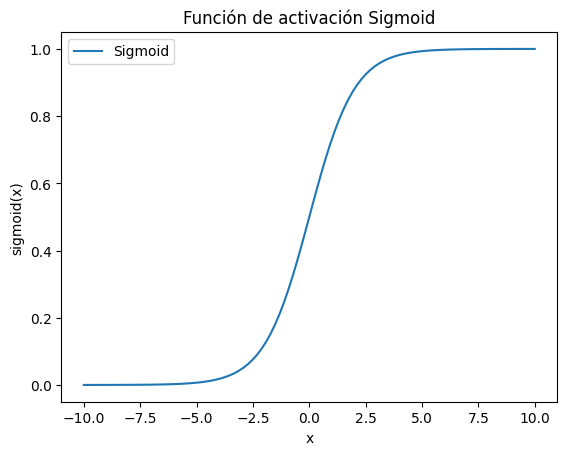

In [69]:
# Graficar la activación Sigmoid
x = np.linspace(-10, 10, 100)
plt.plot(x, activacion_logistica(x)[0], label='Sigmoid')
plt.title('Función de activación Sigmoid')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.legend()
plt.show()